# Import packages

In [1]:
!pip install import_ipynb
!pip install underthesea
!pip install demoji
!pip install pyvi

In [2]:
!pip install spacy
!pip install scattertext
!pip install https://gitlab.com/trungtv/vi_spacy/-/raw/master/vi_core_news_lg/dist/vi_core_news_lg-0.0.1.tar.gz

     |████████████████████████████████| 7.3 MB 11.3 MB/s 
     |████████████████████████████████| 24.1 MB 102.6 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=4d4b0fc5a9113a1ee29e2f3617e4740eb5e098ba03246c4d66bdf36484908900
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 254.5 MB 33 kB/s 
     |████████████████████████████████| 5.8 MB 7.4 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 653 kB 44.2 MB/s 
     |████████████████████████████████| 10.1 MB 44.7 MB/s 
     |████████████████████████████████| 451 kB 47.6 MB/s 
  Created wheel for vi-core-news-lg: filename=vi_core_news_lg-0.0.1-py3-none-any.whl size=2

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
%cd '/content/gdrive/MyDrive/LDS0_K273_DamThiMinhPhuong/Project/Project3_SentimentAnalysis'

/content/gdrive/MyDrive/LDS0_K273_DamThiMinhPhuong/Project/Project3_SentimentAnalysis


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import import_ipynb
import Lib3

pd.options.display.float_format = '{:,.4f}'.format

importing Jupyter notebook from Lib3.ipynb


In [6]:
from underthesea import word_tokenize, pos_tag, sent_tokenize
import regex
import demoji
from pyvi import ViPosTagger, ViTokenizer
import string
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud, STOPWORDS

In [7]:
import spacy
import scattertext as st

# Step 1: Business Understanding

# Step 2: Data Understanding

In [8]:
df = pd.read_csv('data/foodyDataFinal_2.csv', index_col=0)

In [9]:
df.shape

(33632, 3)

In [10]:
df.head()

,name,review_text,review_score
0,Chícc Chícc - Gà Rán Hàn Quốc,"Gà tắm mắm, phô mai kéo sợi siêu ngon, giá mềm",10.0000
1,Chícc Chícc - Gà Rán Hàn Quốc,"Gà BBQ Hàn, phô mai kéo sợi siêu ngon, giá mềm",10.0000
11,Chícc Chícc - Gà Rán Hàn Quốc,Gà với khoai tây quá mặn,1.0000
16,Chícc Chícc - Gà Rán Hàn Quốc,Mình vừa đặt 1 phần gà 92k và vô cùng thất vọn...,4.2000
17,Chícc Chícc - Gà Rán Hàn Quốc,"Đồ ăn chuẩn vị hàn quốc, ngon giá cả hợp lí",9.2000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33632 entries, 0 to 77657
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          33632 non-null  object 
 1   review_text   33632 non-null  object 
 2   review_score  33632 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.0+ MB


In [12]:
df.isnull().sum()

name            0
review_text     0
review_score    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df = df.drop_duplicates()
df.shape

(33632, 3)

In [15]:
df.review_score.describe()

count   33,632.0000
mean         6.7528
std          2.4819
min          1.0000
25%          5.0000
50%          7.4000
75%          8.4000
max         10.0000
Name: review_score, dtype: float64

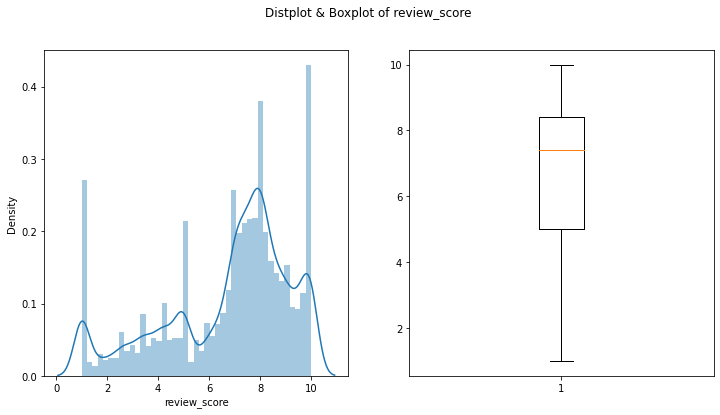

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df.review_score)
plt.subplot(1,2,2)
plt.boxplot(df.review_score)
plt.suptitle('Distplot & Boxplot of review_score')
plt.show()

Nhận xét:
- Score range từ 0 đến 10, phổ biến nhất là từ 6-10
- Biến Score không có outliers

In [17]:
my_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df['review_score_bins'] = pd.cut(df['review_score'], bins=my_bins)

review_score_bins
(7, 8]     8627
(8, 9]     5517
(9, 10]    5151
(6, 7]     4142
(4, 5]     3308
(3, 4]     1825
(0, 1]     1800
(2, 3]     1328
(5, 6]     1234
(1, 2]      700
dtype: int64


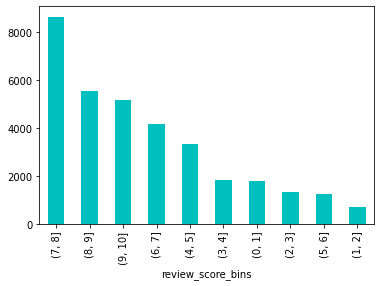

In [18]:
count = df.groupby('review_score_bins').size().sort_values(ascending=False)
count.plot.bar(color='c')
print(count)
plt.show()

Nhận xét:
- Có thể thấy phần lớn điểm số thuộc khoảng (6,10], hầu hết các review đều đánh giá khá tốt, trong khi đó chỉ 1 số ít review đánh giá nhà hàng ở mức trung bình (5) và thấp 
- Ta sẽ chia dữ liệu thành 2 class: 0 - Chưa Tốt (NotLike), 1 - Tốt (Like)

In [19]:
df['label'] = df.review_score.apply(lambda x: 0 if x<=5 else 1)

In [26]:
df['review_class'] = ['positive' if x==1 else 'negative' for x in df.label]

1    24671
0     8961
Name: label, dtype: int64


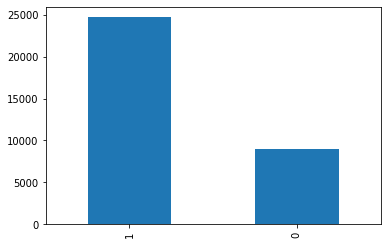

In [20]:
count = df['label'].value_counts()
count.plot.bar()
print(count)
plt.show()

Dữ liệu không cân bằng

In [21]:
# Download Vi Model
nlp = spacy.load('vi_core_news_lg')

In [28]:
# Creating Scattertext Corpus
corpus = st.CorpusFromPandas(df, category_col='review_class',
                             text_col='review_text',
                             nlp=nlp).build()

In [29]:
# Creating the visualization
sent = st.produce_scattertext_explorer(corpus,
                                       category='negative',
                                       category_name='Negative',
                                       not_category_name='Positive',
                                       width_in_pixels=1000,
                                       metadata=df['review_text']
                                       )

In [31]:
open('Foody_Sentiment_ScatterText.html', 'wb').write(sent.encode('utf-8'))

58527426

In [33]:
import pickle
with open('foody_corpus.pkl', mode='wb') as pkl:
  pickle.dump(corpus, pkl)

# Step 3: Data Preparation

In [32]:
#LOAD EMOJICON
file = open('files/emojicon.txt', 'r', encoding="utf8")
emoji_lst = file.read().split('\n')
emoji_dict = {}
for line in emoji_lst:
    key, value = line.split('\t')
    emoji_dict[key] = str(value)
file.close()

#LOAD TEENCODE
file = open('files/teencode.txt', 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()

#LOAD TRANSLATE ENGLISH -> VNMESE
file = open('files/english-vnmese.txt', 'r', encoding="utf8")
english_lst = file.read().split('\n')
english_dict = {}
for line in english_lst:
    key, value = line.split('\t')
    english_dict[key] = str(value)
file.close()

#LOAD wrong words
file = open('files/wrong-word.txt', 'r', encoding="utf8")
wrong_lst = file.read().split('\n')
file.close()

#LOAD STOPWORDS
file = open('files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

In [34]:
df['review_text_clean'] = df['review_text'].apply(lambda x: Lib3.clean_text_thesea(x, emoji_dict, teen_dict, wrong_lst,stopwords_lst))

In [35]:
df[['review_text','review_text_clean']]

,review_text,review_text_clean
0,"Gà tắm mắm, phô mai kéo sợi siêu ngon, giá mềm",gà mắm phô kéo sợi siêu ngon giá mềm .
1,"Gà BBQ Hàn, phô mai kéo sợi siêu ngon, giá mềm",gà hàn phô kéo sợi siêu ngon giá mềm .
11,Gà với khoai tây quá mặn,gà tây mặn .
16,Mình vừa đặt 1 phần gà 92k và vô cùng thất vọn...,gà vô_cùng thất_vọng gà bở mặn lớp bột chiên x...
17,"Đồ ăn chuẩn vị hàn quốc, ngon giá cả hợp lí",đồ chuẩn vị hàn quốc ngon giá_cả hợp_lí .
...,...,...
77653,"Bánh canh ngon, ăn ko ngán, bánh lọc thì tuyệt...",ngon không_ngán lọc tuyệt_vời .
77654,"Được người bạn giới thiệu vào đây, các bạn có ...",giới_thiệu đường võ văn việt đường trần_diệu ....
77655,"Quán nằm trong đường Trần Quang Diệu, mà phải ...",đường trần_diệu sâu xíu không_có giới_thiệu kh...
77656,"Trời mưa lạnh thèm ăn bún bò, lần đầu lại đây ...",trời mưa lạnh thèm bún_bò đầu chiều . tái nạm ...


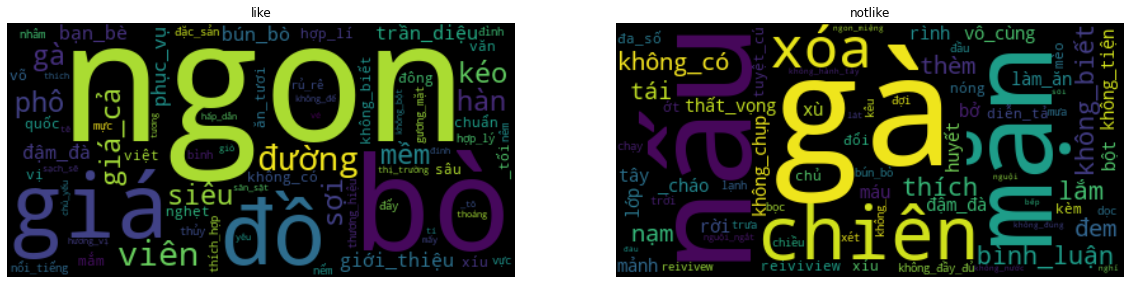

In [36]:
# Vẽ wordcloud để xem những từ phổ biến ở mỗi class
# Like - Class 1
wc_like = WordCloud(
    background_color='black',
    max_words=1000)
wc_like.generate(str(df[df['label']==1]['review_text_clean'].values))

# Not Like
wc_notlike = WordCloud(
    background_color='black',
    max_words=1000)
wc_notlike.generate(str(df[df['label']==0]['review_text_clean'].values))

# display the word clouds
plt.figure(figsize=(20, 12))
plt.subplot(121)
plt.imshow(wc_like, interpolation='bilinear')
plt.title('like')
plt.axis('off')
plt.subplot(122)
plt.imshow(wc_notlike, interpolation='bilinear')
plt.title('notlike')
plt.axis('off')
plt.show()

Từ wordcloud ta thấy có sự khác biệt giữa frequent words của 2 class:
- like: có các từ đại diện mang nghĩa tích cực như là ngon, mềm, chuẩn, hợp lý..
- notlike: có các từ đại diện mang nghĩa tiêu cực mặn, không_có, không_tiện, thất_vọng,..

In [37]:
df.shape

(33632, 7)

In [38]:
df[df['review_text_clean'].isin([''])].shape

(0, 7)

In [39]:
df[df['review_text_clean'].isin([' '])].shape

(0, 7)

In [ ]:
# df.to_csv('data/foodyDataFinal_clean2.csv')